## Web Scraping using python and beautifulsoup4

In [1]:
from bs4 import BeautifulSoup as bs
import requests

In [2]:
import numpy as np
import pandas as pd

### Import Table Data and Converting It into a Nested List

In [3]:
res = requests.get('https://www.worldometers.info/coronavirus/?utm_campaign=homeAdvegas1?')

In [4]:
soup = bs(res.text, "lxml")

In [5]:
table = soup.find('table')

In [6]:
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
</tr>
</thead>
<tbody>
<tr class="total_row_world row_continent" data-continent="Nor

In [7]:
t_col = table.find_all('th')

In [8]:
t_rows = table.find_all('tr')

In [9]:
for th in t_col:
    print(th.text)

#
Country,Other
TotalCases
NewCases
TotalDeaths
NewDeaths
TotalRecovered
NewRecovered
ActiveCases
Serious,Critical
Tot Cases/1M pop
Deaths/1M pop
TotalTests
Tests/
1M pop

Population
Continent
1 Caseevery X ppl
1 Deathevery X ppl
1 Testevery X ppl


In [10]:
for tr in t_rows:
    print(tr.text)


#
Country,Other
TotalCases
NewCases
TotalDeaths
NewDeaths
TotalRecovered
NewRecovered
ActiveCases
Serious,Critical
Tot Cases/1M pop
Deaths/1M pop
TotalTests
Tests/
1M pop

Population
Continent
1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl




North America

5,361,959
+8,747
214,797
+588
2,748,616
+7,184
2,398,546
26,109





North America








South America

3,952,480
+1,207
139,802
+111
2,695,405
+3,276
1,117,273
14,274





South America








Asia

4,167,328
+40,300
94,712
+690
3,067,059
+69,229
1,005,557
19,762





Asia








Europe

2,844,594
+11,806
202,774
+251
1,714,120
+12,052
927,700
5,097





Europe








Africa

896,203
+1,046
18,926
+18
544,932
+764
332,345
1,100





Africa








Oceania

18,037
+722
213
+13
12,246
+1,000
5,578
39





Australia/Oceania










721

15

651

55
4













World
17,241,322
+63,828
671,239
+1,671
10,783,029
+93,505
5,787,054
66,385
2,212
86.1



All






1
USA
4,570,125
+2,088
153,888 
+48
2,246,221
+1,177
2,170,

In [11]:
# converting table data into nested list
rows = []
for tr in t_rows:
    td = tr.find_all('td')
    row = [i.text for i in td]
    rows.append(row)

In [12]:
rows

[[],
 ['',
  '\nNorth America\n',
  '5,361,959',
  '+8,747',
  '214,797',
  '+588',
  '2,748,616',
  '+7,184',
  '2,398,546',
  '26,109',
  '',
  '',
  '',
  '',
  '',
  'North America',
  '\n',
  '',
  ''],
 ['',
  '\nSouth America\n',
  '3,952,480',
  '+1,207',
  '139,802',
  '+111',
  '2,695,405',
  '+3,276',
  '1,117,273',
  '14,274',
  '',
  '',
  '',
  '',
  '',
  'South America',
  '\n',
  '',
  ''],
 ['',
  '\nAsia\n',
  '4,167,328',
  '+40,300',
  '94,712',
  '+690',
  '3,067,059',
  '+69,229',
  '1,005,557',
  '19,762',
  '',
  '',
  '',
  '',
  '',
  'Asia',
  '\n',
  '',
  ''],
 ['',
  '\nEurope\n',
  '2,844,594',
  '+11,806',
  '202,774',
  '+251',
  '1,714,120',
  '+12,052',
  '927,700',
  '5,097',
  '',
  '',
  '',
  '',
  '',
  'Europe',
  '\n',
  '',
  ''],
 ['',
  '\nAfrica\n',
  '896,203',
  '+1,046',
  '18,926',
  '+18',
  '544,932',
  '+764',
  '332,345',
  '1,100',
  '',
  '',
  '',
  '',
  '',
  'Africa',
  '\n',
  '',
  ''],
 ['',
  '\nOceania\n',
  '18,037',
  

In [13]:
rows_values = rows[1:]

In [14]:
rows_values

[['',
  '\nNorth America\n',
  '5,361,959',
  '+8,747',
  '214,797',
  '+588',
  '2,748,616',
  '+7,184',
  '2,398,546',
  '26,109',
  '',
  '',
  '',
  '',
  '',
  'North America',
  '\n',
  '',
  ''],
 ['',
  '\nSouth America\n',
  '3,952,480',
  '+1,207',
  '139,802',
  '+111',
  '2,695,405',
  '+3,276',
  '1,117,273',
  '14,274',
  '',
  '',
  '',
  '',
  '',
  'South America',
  '\n',
  '',
  ''],
 ['',
  '\nAsia\n',
  '4,167,328',
  '+40,300',
  '94,712',
  '+690',
  '3,067,059',
  '+69,229',
  '1,005,557',
  '19,762',
  '',
  '',
  '',
  '',
  '',
  'Asia',
  '\n',
  '',
  ''],
 ['',
  '\nEurope\n',
  '2,844,594',
  '+11,806',
  '202,774',
  '+251',
  '1,714,120',
  '+12,052',
  '927,700',
  '5,097',
  '',
  '',
  '',
  '',
  '',
  'Europe',
  '\n',
  '',
  ''],
 ['',
  '\nAfrica\n',
  '896,203',
  '+1,046',
  '18,926',
  '+18',
  '544,932',
  '+764',
  '332,345',
  '1,100',
  '',
  '',
  '',
  '',
  '',
  'Africa',
  '\n',
  '',
  ''],
 ['',
  '\nOceania\n',
  '18,037',
  '+722

In [15]:
# removing unneccesary values from nested list
row_list = []
for i in range(len(rows_values)):
    r = []
    for j in range(len(rows_values[0])):
        r1 = rows_values[i][j].replace('\n' ,'')
        r2 = r1.replace(',' ,'')
        r.append(r2)
    
    row_list.append(r)

In [16]:
row_list

[['',
  'North America',
  '5361959',
  '+8747',
  '214797',
  '+588',
  '2748616',
  '+7184',
  '2398546',
  '26109',
  '',
  '',
  '',
  '',
  '',
  'North America',
  '',
  '',
  ''],
 ['',
  'South America',
  '3952480',
  '+1207',
  '139802',
  '+111',
  '2695405',
  '+3276',
  '1117273',
  '14274',
  '',
  '',
  '',
  '',
  '',
  'South America',
  '',
  '',
  ''],
 ['',
  'Asia',
  '4167328',
  '+40300',
  '94712',
  '+690',
  '3067059',
  '+69229',
  '1005557',
  '19762',
  '',
  '',
  '',
  '',
  '',
  'Asia',
  '',
  '',
  ''],
 ['',
  'Europe',
  '2844594',
  '+11806',
  '202774',
  '+251',
  '1714120',
  '+12052',
  '927700',
  '5097',
  '',
  '',
  '',
  '',
  '',
  'Europe',
  '',
  '',
  ''],
 ['',
  'Africa',
  '896203',
  '+1046',
  '18926',
  '+18',
  '544932',
  '+764',
  '332345',
  '1100',
  '',
  '',
  '',
  '',
  '',
  'Africa',
  '',
  '',
  ''],
 ['',
  'Oceania',
  '18037',
  '+722',
  '213',
  '+13',
  '12246',
  '+1000',
  '5578',
  '39',
  '',
  '',
  '',
 

### Import Table Data in a Dataframe

In [17]:
df = pd.DataFrame(data = row_list)

In [18]:
df.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,,North America,5361959,+8747,214797,+588,2748616,+7184,2398546,26109,,,,,,North America,,,
1,,South America,3952480,+1207,139802,+111,2695405,+3276,1117273,14274,,,,,,South America,,,
2,,Asia,4167328,+40300,94712,+690,3067059,+69229,1005557,19762,,,,,,Asia,,,
3,,Europe,2844594,+11806,202774,+251,1714120,+12052,927700,5097,,,,,,Europe,,,
4,,Africa,896203,+1046,18926,+18,544932,+764,332345,1100,,,,,,Africa,,,
5,,Oceania,18037,+722,213,+13,12246,+1000,5578,39,,,,,,Australia/Oceania,,,
6,,,721,,15,,651,,55,4,,,,,,,,,
7,,World,17241322,+63828,671239,+1671,10783029,+93505,5787054,66385,2212,86.1,,,,All,,,
8,1,USA,4570125,+2088,153888,+48,2246221,+1177,2170016,18852,13801,465,56708704,171245,331155784,North America,72,2152,6
9,2,Brazil,2555518,,90188,,1787419,,677911,8318,12016,424,12601096,59250,212677716,South America,83,2358,17


In [19]:
df.tail(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
216,209,Western Sahara,10,,1,,8,,1,,17,2,,,598360,Africa,59836,598360,
217,210,MS Zaandam,9,,2,,,,7,,,,,,,,,,
218,211,British Virgin Islands,8,,1,,7,,0,,264,33,439,14514,30247,North America,3781,30247,69
219,212,St. Barth,7,,,,6,,1,,709,,1246,126126,9879,North America,1411,,8
220,213,Saint Pierre Miquelon,4,,,,1,,3,,691,,,,5792,North America,1448,,
221,214,Anguilla,3,,,,3,,0,,200,,380,25311,15013,North America,5004,,40
222,215,China,84165,+105,4634,,78957,+13,574,6,58,3,90410000,62814,1439323776,Asia,17101,310601,16
223,,Total:,5361959,+8747,214797,+588,2748616,+7184,2398546,26109,,,,,,North America,,,
224,,Total:,3952480,+1207,139802,+111,2695405,+3276,1117273,14274,,,,,,South America,,,
225,,Total:,4167328,+40300,94712,+690,3067059,+69229,1005557,19762,,,,,,Asia,,,


In [20]:
df1 = df.iloc[8:222,]

In [21]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
8,1,USA,4570125,+2088,153888,+48,2246221,+1177,2170016,18852,13801,465,56708704,171245,331155784,North America,72,2152,6
9,2,Brazil,2555518,,90188,,1787419,,677911,8318,12016,424,12601096,59250,212677716,South America,83,2358,17
10,3,India,1601070,+16686,35134,+131,1029069,+7458,536867,8944,1159,25,18190382,13171,1381048674,Asia,863,39308,76
11,4,Russia,834499,+5509,13802,+129,629655,+9322,191042,2300,5718,95,27569646,188911,145939561,Europe,175,10574,5
12,5,South Africa,471123,,7497,,297967,,165659,539,7936,126,2873163,48398,59365223,Africa,126,7919,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,210,MS Zaandam,9,,2,,,,7,,,,,,,,,,
218,211,British Virgin Islands,8,,1,,7,,0,,264,33,439,14514,30247,North America,3781,30247,69
219,212,St. Barth,7,,,,6,,1,,709,,1246,126126,9879,North America,1411,,8
220,213,Saint Pierre Miquelon,4,,,,1,,3,,691,,,,5792,North America,1448,,


In [22]:
all_corona = df1[[1,2,4,6,8,12,15,14,13,11]]

In [23]:
df_col = ['Country','Total Case','Total Death','Total Recovered','Active Case','Total Test','Continent','Population','TestperM','DeathperM']

In [24]:
all_corona.columns = df_col

In [25]:
all_corona = all_corona.reset_index(drop=True)

In [26]:
all_corona.head(15)

,Country,Total Case,Total Death,Total Recovered,Active Case,Total Test,Continent,Population,TestperM,DeathperM
0,USA,4570125,153888,2246221,2170016,56708704,North America,331155784,171245,465
1,Brazil,2555518,90188,1787419,677911,12601096,South America,212677716,59250,424
2,India,1601070,35134,1029069,536867,18190382,Asia,1381048674,13171,25
3,Russia,834499,13802,629655,191042,27569646,Europe,145939561,188911,95
4,South Africa,471123,7497,297967,165659,2873163,Africa,59365223,48398,126
5,Mexico,408449,45361,267147,95941,953514,North America,129036569,7389,352
6,Peru,400683,18816,280044,101823,2293612,South America,33006277,69490,570
7,Chile,351575,9278,324557,17740,1580823,South America,19128931,82640,485
8,Spain,329721,28441,N/A,N/A,6678414,Europe,46756254,142835,608
9,Iran,301530,16569,261200,23761,2431804,Asia,84074125,28925,197


In [27]:
all_corona.tail(15)

,Country,Total Case,Total Death,Total Recovered,Active Case,Total Test,Continent,Population,TestperM,DeathperM
199,New Caledonia,22,,22,0,10186,Australia/Oceania,285710,35652,
200,Laos,20,,19,1,26737,Asia,7283442,3671,
201,Dominica,18,,18,0,1005,North America,72000,13958,
202,Saint Kitts and Nevis,17,,15,2,1006,North America,53228,18900,
203,Greenland,14,,13,1,5816,North America,56778,102434,
204,Falkland Islands,13,,13,0,1816,South America,3487,520792,
205,Montserrat,12,1,10,1,61,North America,4992,12220,200
206,Vatican City,12,,12,0,,Europe,801,,
207,Caribbean Netherlands,11,,7,4,424,North America,26242,16157,
208,Western Sahara,10,1,8,1,,Africa,598360,,2


In [28]:
all_corona.to_csv('data.csv')

In [29]:
df_corona = all_corona.copy()
df_corona.drop(['Population','TestperM','DeathperM'],axis = 1,inplace = True)

In [30]:
df_corona.head(15)

,Country,Total Case,Total Death,Total Recovered,Active Case,Total Test,Continent
0,USA,4570125,153888,2246221,2170016,56708704,North America
1,Brazil,2555518,90188,1787419,677911,12601096,South America
2,India,1601070,35134,1029069,536867,18190382,Asia
3,Russia,834499,13802,629655,191042,27569646,Europe
4,South Africa,471123,7497,297967,165659,2873163,Africa
5,Mexico,408449,45361,267147,95941,953514,North America
6,Peru,400683,18816,280044,101823,2293612,South America
7,Chile,351575,9278,324557,17740,1580823,South America
8,Spain,329721,28441,N/A,N/A,6678414,Europe
9,Iran,301530,16569,261200,23761,2431804,Asia


In [31]:
df_corona.tail(15)

,Country,Total Case,Total Death,Total Recovered,Active Case,Total Test,Continent
199,New Caledonia,22,,22,0,10186,Australia/Oceania
200,Laos,20,,19,1,26737,Asia
201,Dominica,18,,18,0,1005,North America
202,Saint Kitts and Nevis,17,,15,2,1006,North America
203,Greenland,14,,13,1,5816,North America
204,Falkland Islands,13,,13,0,1816,South America
205,Montserrat,12,1,10,1,61,North America
206,Vatican City,12,,12,0,,Europe
207,Caribbean Netherlands,11,,7,4,424,North America
208,Western Sahara,10,1,8,1,,Africa


In [32]:
df_corona.isnull()

,Country,Total Case,Total Death,Total Recovered,Active Case,Total Test,Continent
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
209,False,False,False,False,False,False,False
210,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False


In [33]:
df_corona.replace(to_replace = ' ', value = 0, inplace = True)
df_corona.replace(to_replace = '', value = 0, inplace = True)
df_corona.replace(to_replace = 'N/A', value = 0, inplace = True)

In [34]:
df_corona.tail(30)

,Country,Total Case,Total Death,Total Recovered,Active Case,Total Test,Continent
184,Turks and Caicos,104,2,37,65,1168,North America
185,Bhutan,101,0,88,13,42190,Asia
186,Antigua and Barbuda,91,3,67,21,1345,North America
187,Liechtenstein,88,1,85,2,900,Europe
188,Papua New Guinea,63,2,11,50,10000,Australia/Oceania
189,French Polynesia,62,0,62,0,5390,Australia/Oceania
190,St. Vincent Grenadines,52,0,39,13,1866,North America
191,Saint Martin,49,3,41,5,1080,North America
192,Belize,48,2,27,19,3251,North America
193,Macao,46,0,46,0,4071,Asia


In [35]:
df_corona['Total Case'] = df_corona['Total Case'].astype('int')
df_corona['Total Death'] = df_corona['Total Death'].astype('int')
df_corona['Total Recovered'] = df_corona['Total Recovered'].astype('int')
df_corona['Total Test'] = df_corona['Total Test'].astype('int')
df_corona['Active Case'] = df_corona['Active Case'].astype('int')

In [36]:
df_corona['Continent'] = df_corona['Continent'].astype('str')

In [37]:
# data types in df2
df_corona.dtypes

Country            object
Total Case          int32
Total Death         int32
Total Recovered     int32
Active Case         int32
Total Test          int32
Continent          object
dtype: object

In [38]:
df_corona.shape

(214, 7)

In [39]:
import folium

In [40]:
df_corona

,Country,Total Case,Total Death,Total Recovered,Active Case,Total Test,Continent
0,USA,4570125,153888,2246221,2170016,56708704,North America
1,Brazil,2555518,90188,1787419,677911,12601096,South America
2,India,1601070,35134,1029069,536867,18190382,Asia
3,Russia,834499,13802,629655,191042,27569646,Europe
4,South Africa,471123,7497,297967,165659,2873163,Africa
...,...,...,...,...,...,...,...
209,MS Zaandam,9,2,0,7,0,0
210,British Virgin Islands,8,1,7,0,439,North America
211,St. Barth,7,0,6,1,1246,North America
212,Saint Pierre Miquelon,4,0,1,3,0,North America


In [41]:
df_covid = df_corona.set_index('Country')

In [42]:
df_covid

,Total Case,Total Death,Total Recovered,Active Case,Total Test,Continent
Country,,,,,,
USA,4570125,153888,2246221,2170016,56708704,North America
Brazil,2555518,90188,1787419,677911,12601096,South America
India,1601070,35134,1029069,536867,18190382,Asia
Russia,834499,13802,629655,191042,27569646,Europe
South Africa,471123,7497,297967,165659,2873163,Africa
...,...,...,...,...,...,...
MS Zaandam,9,2,0,7,0,0
British Virgin Islands,8,1,7,0,439,North America
St. Barth,7,0,6,1,1246,North America


In [43]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

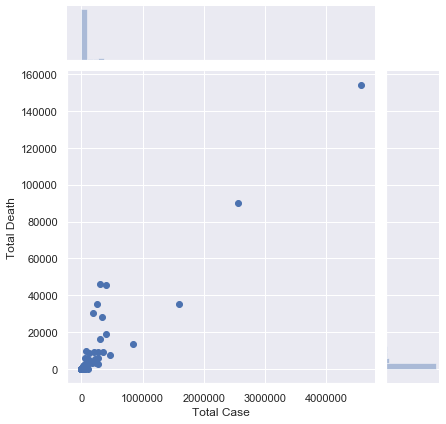

In [44]:
sns.jointplot(x='Total Case',y='Total Death',data=df_corona,kind='scatter')

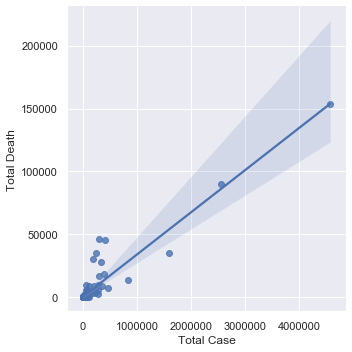

In [45]:
sns.lmplot(x='Total Case',y='Total Death',data=df_corona)

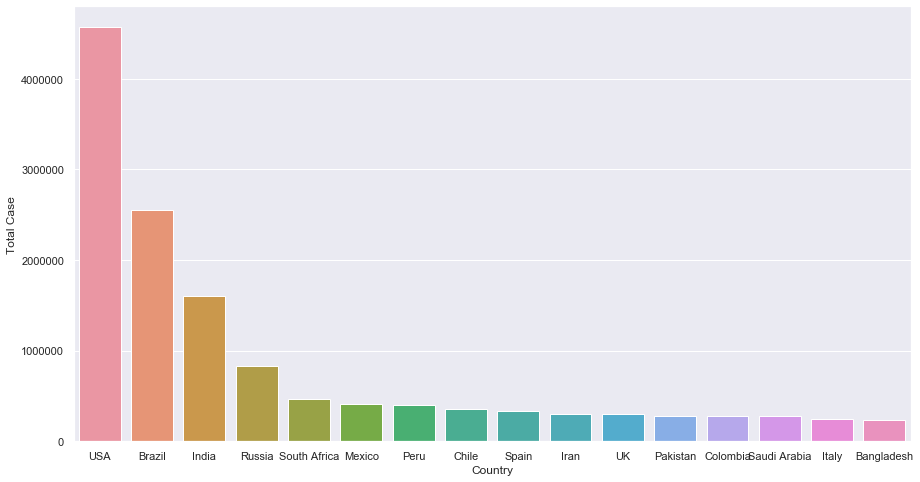

In [46]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='Country',y='Total Case',data=df_corona.iloc[0:16,])


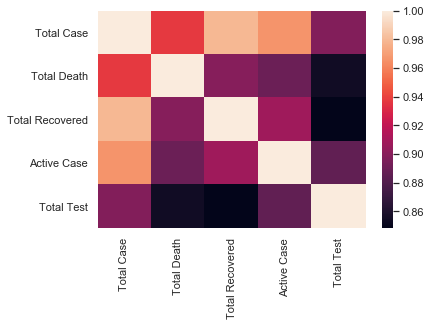

In [47]:
sns.heatmap(df_covid.corr())

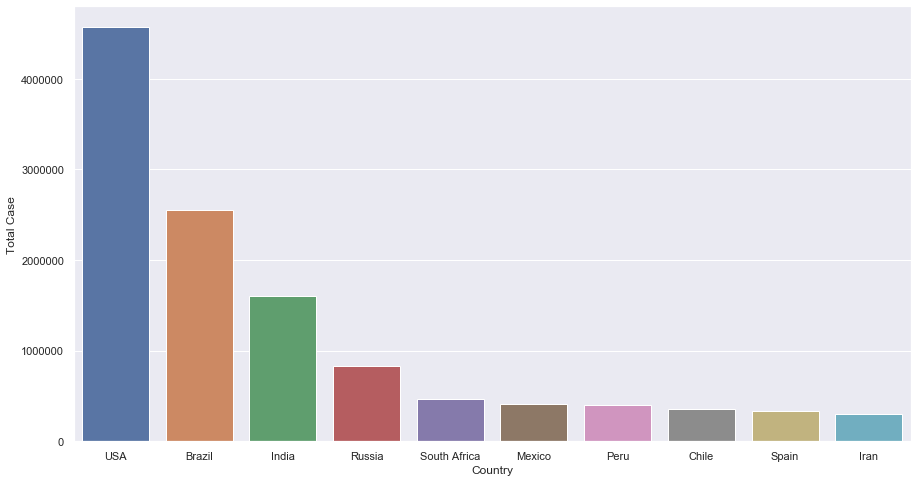

In [48]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='Country',y='Total Case',data=df_corona.iloc[0:10,])